<a href="https://colab.research.google.com/github/fontanadaniel11/matplotlib/blob/main/Pandas_Matplotlib(tutti%20i%20grafici).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('https://github.com/italia/covid19-opendata-vaccini/blob/master/dati/somministrazioni-vaccini-latest.csv?raw=true')
df1

,data,forn,area,eta,m,f,d1,d2,dpi,db1,db2,N1,N2,ISTAT,reg
0,2020-12-27,Moderna,LAZ,40-49,0,1,1,0,0,0,0,ITI,ITI4,12,Lazio
1,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,0,ITG,ITG1,19,Sicilia
2,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273975,2022-11-28,Pfizer/BioNTech,VEN,50-59,32,62,1,0,0,28,65,ITH,ITH3,5,Veneto
273976,2022-11-28,Pfizer/BioNTech,VEN,60-69,258,301,1,2,0,69,487,ITH,ITH3,5,Veneto
273977,2022-11-28,Pfizer/BioNTech,VEN,70-79,302,252,0,0,1,46,507,ITH,ITH3,5,Veneto
273978,2022-11-28,Pfizer/BioNTech,VEN,80-89,109,127,0,1,0,12,223,ITH,ITH3,5,Veneto


In [ ]:
dfVacc = df1.groupby(['area'], as_index=False)['d1'].sum() #as_index = False è sostituibile a reset_index()
dfVacc

,area,d1
0,ABR,1048824
1,BAS,454733
2,CAL,1512508
3,CAM,4539564
4,EMR,3663021
5,FVG,955530
6,LAZ,4850396
7,LIG,1261684
8,LOM,8428084
9,MAR,1189633


In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
df2

,area,reg,eta,totale_popolazione
0,ABR,Abruzzo,05-11,76431
1,ABR,Abruzzo,12-19,94727
2,ABR,Abruzzo,20-29,125230
3,ABR,Abruzzo,30-39,146965
4,ABR,Abruzzo,40-49,187162
...,...,...,...,...
184,VEN,Veneto,40-49,715790
185,VEN,Veneto,50-59,806474
186,VEN,Veneto,60-69,610635
187,VEN,Veneto,70-79,494721


In [ ]:
dfTotale = df2.groupby(['area'], as_index=False).sum()
dfTotale

,area,totale_popolazione
0,ABR,1265353
1,BAS,524588
2,CAL,1803821
3,CAM,5484138
4,EMR,4300226
5,FVG,1163152
6,LAZ,5530930
7,LIG,1480468
8,LOM,9904997
9,MAR,1456240


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

<BarContainer object of 21 artists>

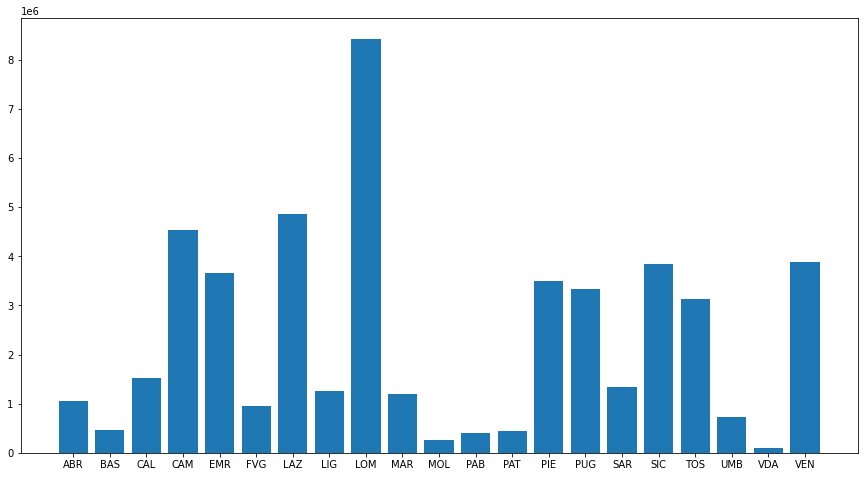

In [ ]:
labels = dfVacc['area']
dati = dfVacc['d1'] 

fig, ax = plt.subplots(figsize=(15,8)) #serve per creare una figura con una determinata grandezza dove verrà inserito il grafico
ax.bar(labels, dati, label='totale vaccinati in ogni regione') #bar serve per indicare che il grafico docrà essere a barre (prima si mettono le x e poi le y)

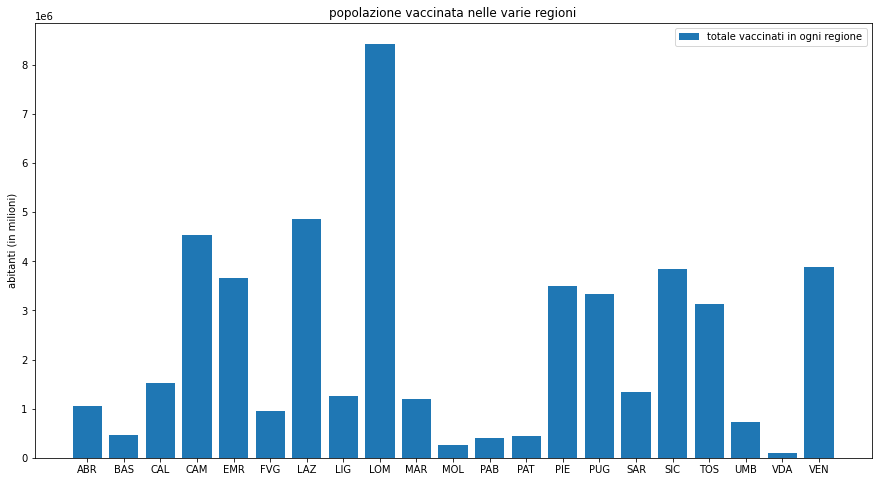

In [ ]:
labels = dfVacc['area']
dati = dfVacc['d1']

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='totale vaccinati in ogni regione')

ax.set_ylabel('abitanti (in milioni)')
ax.set_title('popolazione vaccinata nelle varie regioni')
ax.set_xticklabels(labels) 
ax.legend()

<BarContainer object of 21 artists>

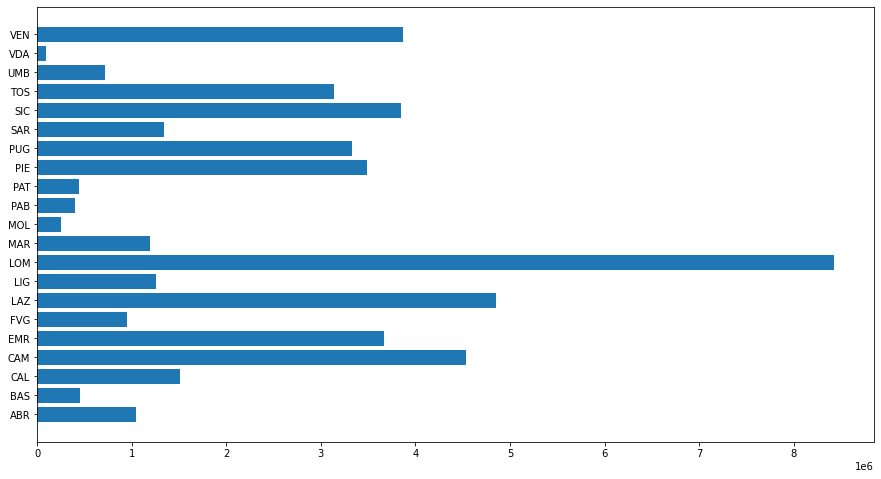

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(labels, dati, label='totale vaccinati in ogni regione') #barh serve per mettere le barre in orizzontale 

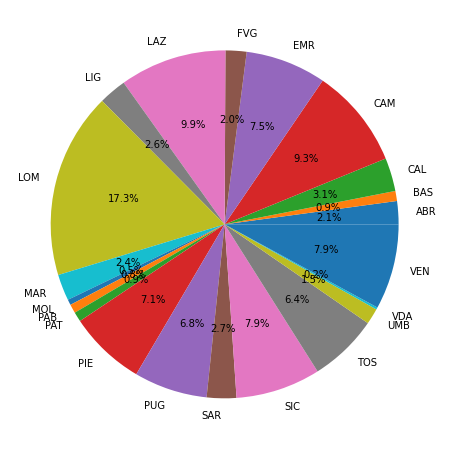

In [ ]:
plt.figure(figsize=(16, 8))
plt.pie(dati, labels=labels, autopct='%1.1f%%') #pie: grafico a torta. Prima si mettono i dati e poi le regione (in questo caso). %1.1f%% si intende la percentuale
plt.show()

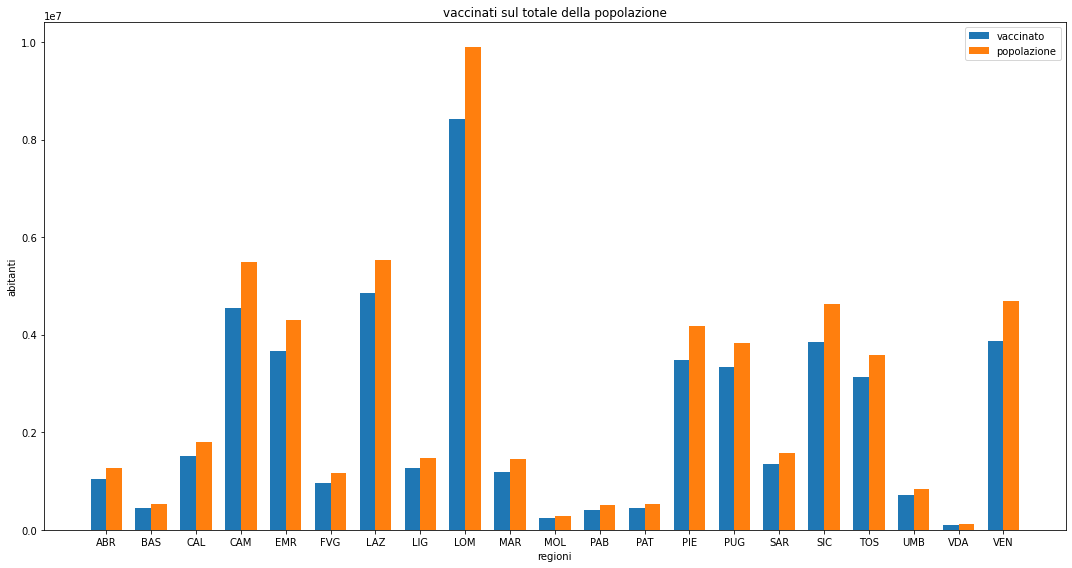

In [ ]:
labels = dfTotale['area']
vaccinati = dfVacc['d1']
popolazione = dfTotale['totale_popolazione']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x - width/2, vaccinati, width, label='vaccinato')
ax.bar(x + width/2, popolazione, width, label='popolazione')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('abitanti')
ax.set_xlabel('regioni')
ax.set_title('vaccinati sul totale della popolazione')
ax.set_xticks(x)
ax.set_xticklabels(labels) 
ax.legend()

fig.tight_layout()

plt.show()

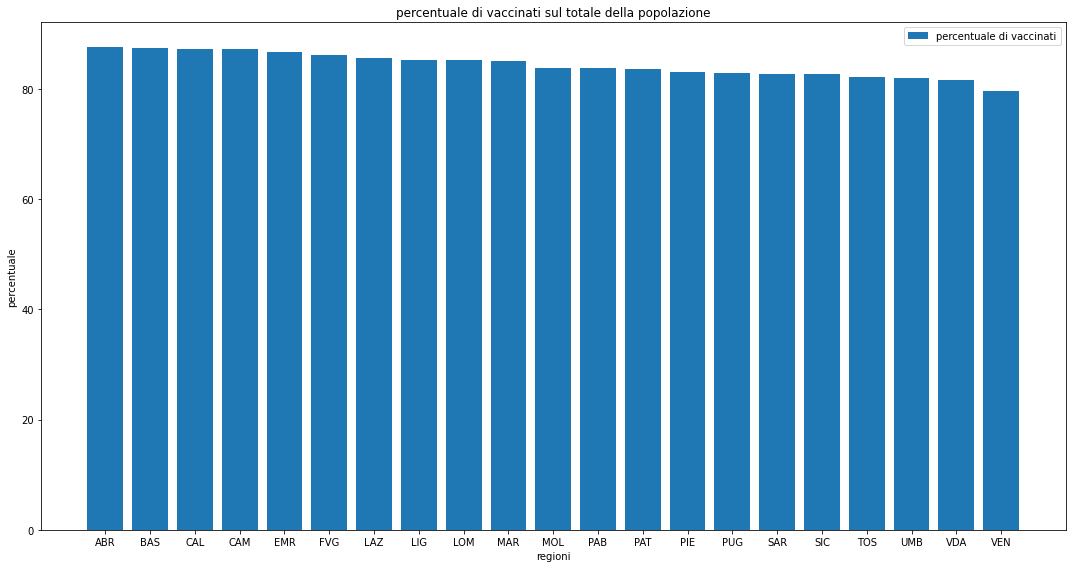

In [ ]:
labels = dfTotale['area']
dati = dfVacc['d1']/dfTotale['totale_popolazione']*100
dati.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='percentuale di vaccinati')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentuale')
ax.set_xlabel('regioni')
ax.set_title('percentuale di vaccinati sul totale della popolazione')
ax.set_xticks(x)
ax.set_xticklabels(labels) 
ax.legend()

fig.tight_layout()

plt.show()